In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
!pip install griddb_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.9/784.9 kB 6.6 MB/s eta 0:00:00


In [ ]:
heart_dataset = pd.read_csv('/content/heart.csv')

In [ ]:
heart_dataset.shape

(918, 12)

In [ ]:
heart_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart_dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
heart_dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart_dataset.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
categorical_cols= heart_dataset.select_dtypes(include=['object'])
categorical_cols.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
for cols in categorical_cols.columns:
    print(cols,'-', len(categorical_cols[cols].unique()),'Labels')

Sex - 2 Labels
ChestPainType - 4 Labels
RestingECG - 3 Labels
ExerciseAngina - 2 Labels
ST_Slope - 3 Labels


In [ ]:
train, test = train_test_split(heart_dataset,test_size=0.3,random_state= 1234)

In [ ]:
labels = [x for x in train.ChestPainType.value_counts().index]
values = train.ChestPainType.value_counts()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title_text="Distribution of data by Chest Pain Type (in %)")
fig.update_traces()
fig.show()

In [ ]:
fig=px.histogram(heart_dataset,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=heart_dataset.columns,
                 title="Distribution of Heart Diseases by Gender",
                 barmode="group")
fig.show()

In [ ]:
train['Sex'] = np.where(train['Sex'] == "M", 0, 1)
train['ExerciseAngina'] = np.where(train['ExerciseAngina'] == "N", 0, 1)
test['Sex'] = np.where(test['Sex'] == "M", 0, 1)
test['ExerciseAngina'] = np.where(test['ExerciseAngina'] == "N", 0, 1)

In [ ]:
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
578,57,0,ASY,156,173,0,LVH,119,1,3.0,Down,1
480,58,0,ATA,126,0,1,Normal,110,1,2.0,Flat,1
512,35,0,NAP,123,161,0,ST,153,0,-0.1,Up,0
634,40,0,TA,140,199,0,Normal,178,1,1.4,Up,0
412,56,0,ASY,125,0,1,Normal,103,1,1.0,Flat,1


In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
578,57,0,156,173,0,119,1,3.0,1,1,0,0,0,1,0,0,1,0,0
480,58,0,126,0,1,110,1,2.0,1,0,1,0,0,0,1,0,0,1,0
512,35,0,123,161,0,153,0,-0.1,0,0,0,1,0,0,0,1,0,0,1
634,40,0,140,199,0,178,1,1.4,0,0,0,0,1,0,1,0,0,0,1
412,56,0,125,0,1,103,1,1.0,1,1,0,0,0,0,1,0,0,1,0


In [ ]:
test.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
581,48,0,140,208,0,159,1,1.5,1,1,0,0,0,0,1,0,0,0,1
623,60,0,140,293,0,170,0,1.2,1,1,0,0,0,1,0,0,0,1,0
60,49,0,100,253,0,174,0,0.0,0,0,1,0,0,0,1,0,0,0,1
613,58,0,140,385,1,135,0,0.3,0,1,0,0,0,1,0,0,0,0,1
40,54,1,150,230,0,130,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
train.shape

(642, 19)

In [ ]:
x_train=train.drop(['HeartDisease'],1)
x_test=test.drop(['HeartDisease'],1)

y_train=train['HeartDisease']
y_test=test['HeartDisease']

<ipython-input-21-7f118799b7b0>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-21-7f118799b7b0>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
print(x_train.shape)
print(x_test.shape)

(642, 18)
(276, 18)


In [ ]:
lr = LogisticRegression(max_iter=10000)
model1=lr.fit(x_train, y_train)

In [ ]:
print("Train accuracy:",model1.score(x_train, y_train))

Train accuracy: 0.8582554517133957


In [ ]:
print("Test accuracy:",model1.score(x_test,y_test))

Test accuracy: 0.894927536231884


In [ ]:
lrpred = lr.predict(x_test)

In [ ]:
print(classification_report(lrpred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       114
           1       0.93      0.89      0.91       162

    accuracy                           0.89       276
   macro avg       0.89      0.90      0.89       276
weighted avg       0.90      0.89      0.90       276



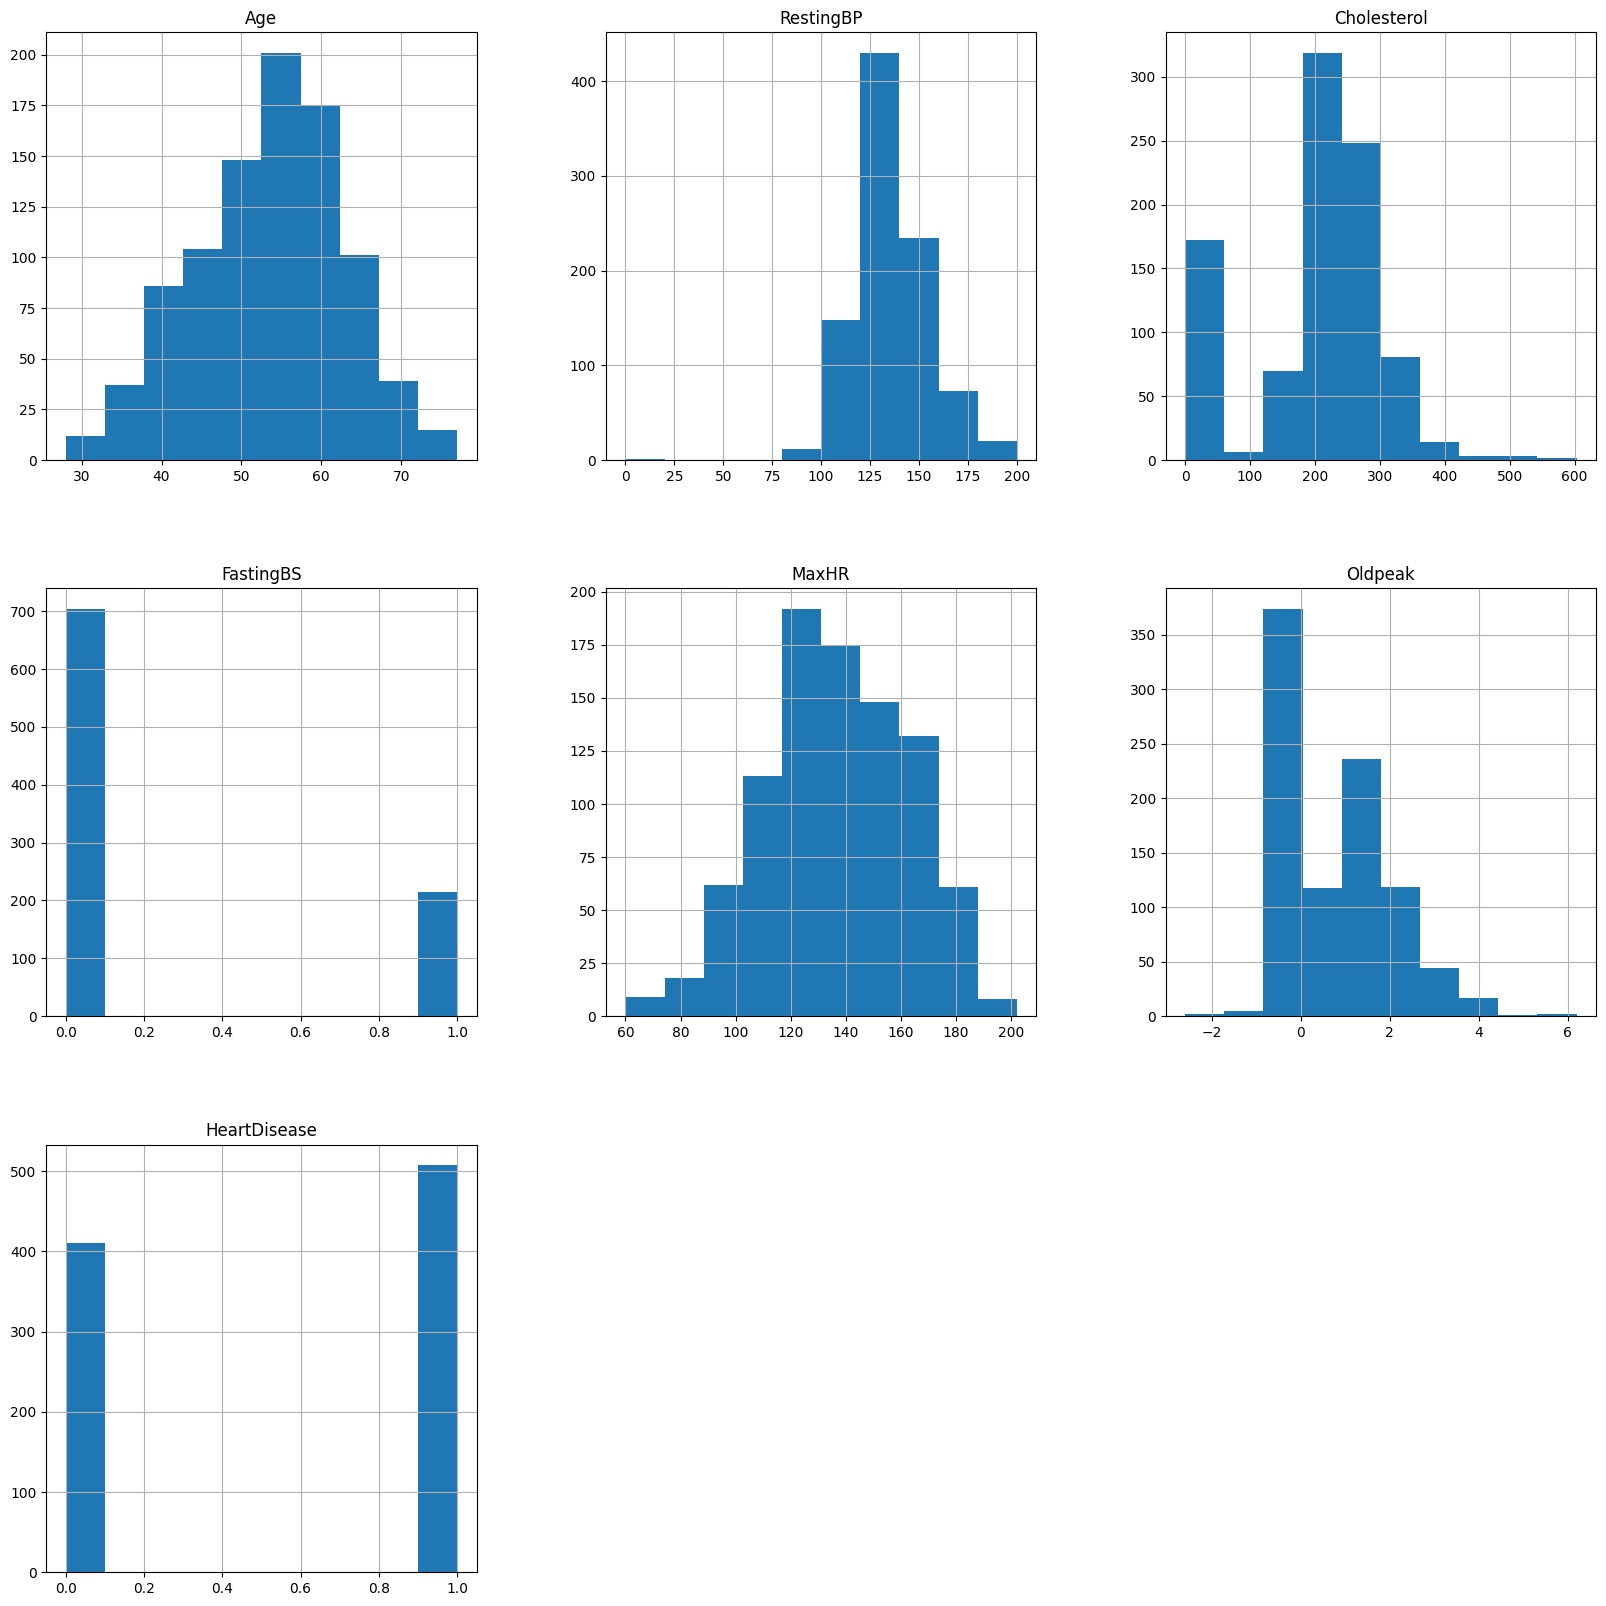

In [ ]:
import matplotlib.pyplot as plt
heart_dataset.hist(figsize = (20,20))

plt.show()